In [3]:
!pip install gdown

  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)


In [4]:
import gdown
import zipfile
import pandas as pd
import os

In [6]:
# Use gdown to download the ZIP file from Google Drive
url = 'https://drive.google.com/uc?id=1WDlvn-B68K-kcETeL6iVIGg8OwSFxsdJ'  # Extracted ID from the provided link
output = '../data/raw/itineraries.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1WDlvn-B68K-kcETeL6iVIGg8OwSFxsdJ
From (redirected): https://drive.google.com/uc?id=1WDlvn-B68K-kcETeL6iVIGg8OwSFxsdJ&confirm=t&uuid=0a8b7e6d-3920-44c0-9acb-30f10a7acf69
To: /home/jovyan/workspace/adv_mla_at3/data/raw/itineraries.zip
100%|██████████| 902M/902M [00:06<00:00, 150MB/s]  


'../data/raw/itineraries.zip'

In [7]:
# Extract the downloaded ZIP file to a local directory
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('../data/raw/itineraries_csv/')

In [12]:
data_dir = '../data/raw/itineraries_csv/itineraries_csv/'
merged_df = []

In [13]:
def read_df(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        csv_file = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
        with zip_ref.open(csv_file) as file:
            df = pd.read_csv(file)
            merged_df.append(df)

In [14]:
for airport_code in os.listdir(data_dir):
    airport_folder = os.path.join(data_dir, airport_code)
    if os.path.isdir(airport_folder):
        for zip_file in os.listdir(airport_folder):
            if zip_file.endswith('.zip'):
                zip_path = os.path.join(airport_folder, zip_file)
                read_df(zip_path)

In [15]:
combined_df = pd.concat(merged_df, ignore_index=True)

In [16]:
combined_df.shape    #13.5M

(13519999, 23)

In [17]:
combined_df.sample(10)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
11862484,5cd93a22762bdbae5c187ced0b3362ba,2022-04-28,2022-05-13,IAD,DEN,PT7H34M,False,False,False,294.60,...,1652440800||1652463300,2022-05-13T07:20:00.000-04:00||2022-05-13T11:3...,JFK||DEN,IAD||JFK,Delta||Delta,DL||DL,Embraer 175||Boeing 737-900,4740||16500,221||1621,coach||coach
2195822,c2bf0bb70298a57e58dd99c3515eb54f,2022-04-28,2022-05-31,ATL,PHL,PT2H3M,False,False,True,308.60,...,1654042200,2022-05-31T20:10:00.000-04:00,PHL,ATL,Delta,DL,Boeing 737-900,7380,667,coach
7325052,6ec77c0d4690ebd4b53f5d22b268bd83,2022-05-05,2022-06-08,LAX,PHL,PT12H48M,False,False,False,489.20,...,1654712460||1654742880,2022-06-08T14:21:00.000-04:00||2022-06-08T22:4...,ATL||PHL,ONT||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 737-900,15660||7380,1919||667,coach||coach
6314819,30e3363583dfbf3f1047bb5dd4cd12e0,2022-04-19,2022-05-17,MIA,BOS,PT3H21M,False,False,True,253.61,...,1652823660,2022-05-17T17:41:00.000-04:00,BOS,MIA,JetBlue Airways,B6,Boeing 737-800,12060,1260,coach
3000088,c41d393c58615e56d58299d4edbb5019,2022-04-28,2022-06-11,CLT,MIA,PT9H8M,False,False,False,639.10,...,1654976580||1655000880,2022-06-11T14:43:00.000-05:00||2022-06-11T22:2...,ORD||MIA,CLT||ORD,United||United,UA||UA,||Boeing 737-800,8580||11760,592||1192,coach||coach
12301230,50c7c9bd3a43bbf589c963202a3217ca,2022-04-25,2022-05-04,EWR,DTW,PT6H50M,False,False,False,259.58,...,1651687320||1651705560,2022-05-04T14:02:00.000-04:00||2022-05-04T19:0...,MYR||DTW,EWR||MYR,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,6360||6960,None||None,coach||coach
10887218,b339e5a85478a4ad279734aa33f7cbf5,2022-04-18,2022-05-01,LGA,BOS,PT1H27M,False,False,True,198.60,...,1651426020,2022-05-01T13:27:00.000-04:00,BOS,LGA,American Airlines,AA,Embraer 190,5220,185,coach
8712544,a2f6baa69a7ac19e68d164e4d8f766df,2022-05-12,2022-05-31,PHL,CLT,PT3H14M,False,False,False,160.60,...,1654014060||1654019640,2022-05-31T12:21:00.000-04:00||2022-05-31T13:5...,RDU||CLT,PHL||RDU,American Airlines||American Airlines,AA||AA,Canadair Regional Jet 900||Airbus A321,6060||3780,339||130,coach||coach
9118517,40dce77e536ee5003ab072cdc6753827,2022-04-21,2022-05-13,PHL,EWR,PT9H5M,False,False,False,385.71,...,1652476860||1652503200,2022-05-13T17:21:00.000-04:00||2022-05-14T00:4...,CLT||EWR,PHL||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,6360||6600,449||545,coach||coach
11731767,ff69843eaea15d1563fc16bd99f8f71d,2022-05-06,2022-06-17,IAD,SFO,PT8H9M,False,False,False,718.60,...,1655471040||1655490840,2022-06-17T08:04:00.000-05:00||2022-06-17T11:3...,MSP||SFO,IAD||MSP,Delta||Delta,DL||DL,Canadair Regional Jet 900||Airbus A321,9540||15240,918||1586,coach||coach


In [18]:
combined_df["startingAirport"].value_counts()

startingAirport
LAX    1352275
LGA    1021938
BOS     989175
SFO     949046
DFW     896596
ORD     894646
MIA     875288
ATL     874069
CLT     854536
PHL     785039
DEN     770429
DTW     747751
EWR     699628
JFK     688263
IAD     594215
OAK     527105
Name: count, dtype: int64

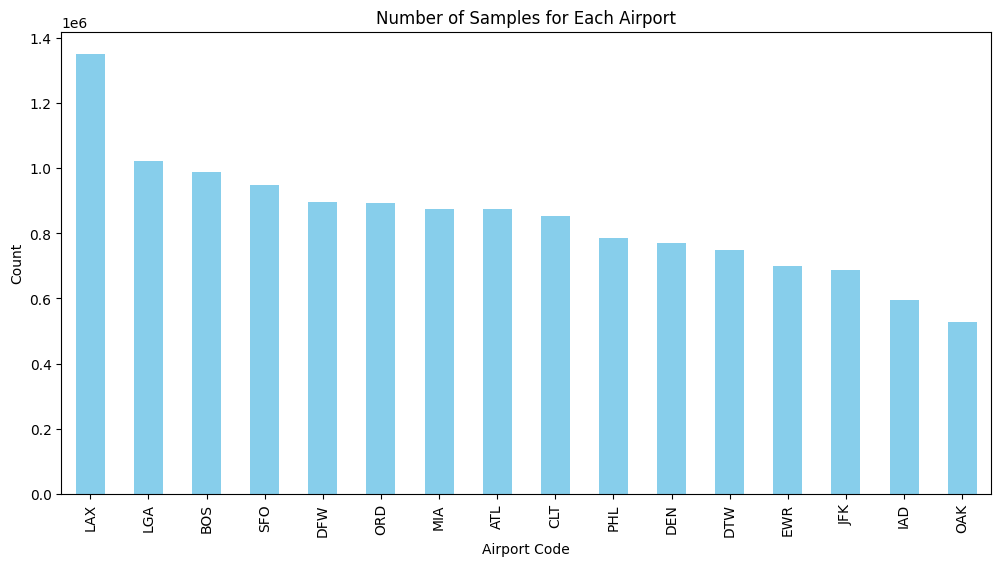

In [19]:
import matplotlib.pyplot as plt

airport_counts = combined_df["startingAirport"].value_counts()

plt.figure(figsize=(12, 6)) 
airport_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples for Each Airport')
plt.xlabel('Airport Code')
plt.ylabel('Count')

plt.show()

### Save data in feather format

In [20]:
!pip install feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2452 sha256=ac25e6ae1a70e847f9837d8d66ac41ded7c8fdd2d5594d27eef7e6b828ade888
  Stored in directory: /home/jovyan/.cache/pip/wheels/e3/dc/eb/3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather-format


In [21]:
import feather

output_feather_file = '../data/interim/merged_df.feather'

feather.write_dataframe(combined_df, output_feather_file)

In [22]:
combined_df.to_pickle('../data/interim/merged_data.pkl.gz', compression='gzip')

# EDA

In [5]:
# Google Drive file URL
url = f'https://drive.google.com/uc?id=1MKid8FimGY7kKRgBNCaeyAgaVbByn1v_'

# Download the file
gdown.download(url, 'merged_data.pkl.gz', quiet=True)

# Load the file using pandas
data = pd.read_pickle('merged_data.pkl.gz')

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,1a51d72836abfb4222f66fca6f4a49d2,2022-05-08,2022-06-17,DTW,ATL,PT2H2M,False,False,True,85.59,NaN,1655503140,2022-06-17T17:59:00.000-04:00,1655510460,2022-06-17T20:01:00.000-04:00,ATL,DTW,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7320,NaN,coach
1,4e47e915423eb0dae0f016aae59b9f1a,2022-05-08,2022-06-17,DTW,ATL,PT2H3M,False,False,True,85.59,NaN,1655515500,2022-06-17T21:25:00.000-04:00,1655522880,2022-06-17T23:28:00.000-04:00,ATL,DTW,Spirit Airlines,NK,NaN,7380,NaN,coach
2,4dff7978ba7a51f23c428ccd9fa2e306,2022-05-08,2022-06-17,DTW,ATL,PT2H,False,False,True,135.59,NaN,1655482140,2022-06-17T12:09:00.000-04:00,1655489340,2022-06-17T14:09:00.000-04:00,ATL,DTW,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7200,NaN,coach
3,d7ce76b3688270c58e6699d320a49395,2022-05-08,2022-06-17,DTW,ATL,PT1H56M,True,False,True,148.60,604.0,1655506380,2022-06-17T18:53:00.000-04:00,1655513340,2022-06-17T20:49:00.000-04:00,ATL,DTW,Delta,DL,Airbus A321,6960,604,coach
4,e93fb65eb0a493f7222694293fb5d53b,2022-05-08,2022-06-17,DTW,ATL,PT1H56M,True,False,True,148.60,604.0,1655514240,2022-06-17T21:04:00.000-04:00,1655521200,2022-06-17T23:00:00.000-04:00,ATL,DTW,Delta,DL,Boeing 757-300,6960,604,coach


In [5]:
# Descriptive statistics
pd.set_option('display.max_columns', None)
data.describe(include='all')

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
count,13519999,13519999,13519999,13519999,13519999,13519999,13519999,13519999,13519999,1.352000e+07,1.256038e+07,13519999,13519999,13519999,13519999,13519999,13519999,13519999,13519999,13257323,13519999,13393014,13519999
unique,1721518,32,92,16,16,1836,2,2,2,NaN,NaN,1273965,1374911,1447133,1513276,5986,5877,118,118,6882,110976,12126,52
top,44861e41bddc25a1ec5ddbec6883a293,2022-05-02,2022-05-24,LAX,LAX,PT1H25M,False,False,False,NaN,NaN,1653040800,2022-05-18T06:00:00.000-04:00,1653278340,2022-05-20T23:59:00.000-04:00,ORD,ORD,American Airlines||American Airlines,AA||AA,Boeing 737-800,5100,None||None,coach||coach
freq,35,540011,285643,1352275,1295126,53758,12768661,13519808,9564064,NaN,NaN,1703,1599,508,378,366241,367420,2401766,2401766,737328,53758,804766,8528140
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.737535e+02,1.569619e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.075496e+02,8.414888e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.397000e+01,9.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.235800e+02,8.620000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.446000e+02,1.392000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.876000e+02,2.376000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data types of each column
data.dtypes

legId                                 object
searchDate                            object
flightDate                            object
startingAirport                       object
destinationAirport                    object
travelDuration                        object
isBasicEconomy                          bool
isRefundable                            bool
isNonStop                               bool
totalFare                            float64
totalTravelDistance                  float64
segmentsDepartureTimeEpochSeconds     object
segmentsDepartureTimeRaw              object
segmentsArrivalTimeEpochSeconds       object
segmentsArrivalTimeRaw                object
segmentsArrivalAirportCode            object
segmentsDepartureAirportCode          object
segmentsAirlineName                   object
segmentsAirlineCode                   object
segmentsEquipmentDescription          object
segmentsDurationInSeconds             object
segmentsDistance                      object
segmentsCa

In [7]:
data.isnull().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

In [8]:
data.shape

(13519999, 23)

In [12]:
data.sample(5)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
6627437,38be8b2ac97360b16244cd33d43c14b0,2022-05-09,2022-06-27,MIA,DEN,PT9H5M,False,False,False,388.60,2466.0,1656325500||1656352740,2022-06-27T06:25:00.000-04:00||2022-06-27T11:5...,1656343740||1656358200,2022-06-27T09:29:00.000-06:00||2022-06-27T13:3...,SLC||DEN,MIA||SLC,Delta||Delta,DL||DL,Boeing 737-900||Airbus A319,18240||5460,2086||380,coach||coach
9656123,22cf89afc97dcef2f51becb708c34fed,2022-05-13,2022-05-15,DEN,LAX,PT3H36M,False,False,False,369.60,916.0,1652661660||1652670300,2022-05-15T18:41:00.000-06:00||2022-05-15T20:0...,1652668620||1652674620,2022-05-15T19:37:00.000-07:00||2022-05-15T21:1...,PHX||ONT,DEN||PHX,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A320,6960||4320,590||326,coach||coach
1298708,a590f0e24a9c8e537384d9fee11abefe,2022-05-13,2022-06-10,DFW,ORD,PT10H8M,False,False,False,306.58,NaN,1654875060||1654896660,2022-06-10T10:31:00.000-05:00||2022-06-10T14:3...,1654886880||1654911540,2022-06-10T11:48:00.000-07:00||2022-06-10T20:3...,LAX||ORD,DFW||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,11820||14880,None||None,coach||coach
11194056,005289f623a4b2e2a965963c801ba284,2022-04-27,2022-05-22,LGA,DTW,PT4H1M,False,False,False,324.60,612.0,1653263700||1653272400,2022-05-22T19:55:00.000-04:00||2022-05-22T22:2...,1653268800||1653278160,2022-05-22T21:20:00.000-04:00||2022-05-22T23:5...,IAD||DTW,LGA||IAD,United||United,UA||UA,Embraer 175 (Enhanced Winglets)||Embraer EMB-145,5100||5760,221||391,coach||coach
1546821,2f41848b9387e4666d3bdb71cb353b72,2022-04-17,2022-05-03,DFW,DEN,PT2H5M,False,False,True,143.60,650.0,1651598880,2022-05-03T12:28:00.000-05:00,1651606380,2022-05-03T13:33:00.000-06:00,DEN,DFW,American Airlines,AA,Airbus A321,7500,650,coach


In [14]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.4 MB/s eta 0:00:00a 0:00:01


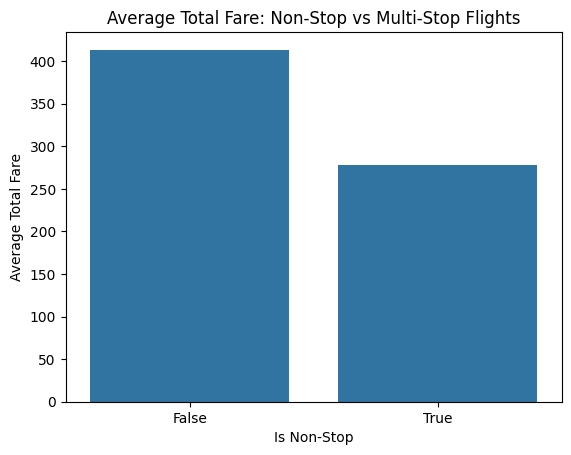

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the average totalFare for each group
avg_fare = data.groupby('isNonStop')['totalFare'].mean().reset_index()

# Create the bar plot
sns.barplot(x='isNonStop', y='totalFare', data=avg_fare)

# Set the title and labels
plt.title('Average Total Fare: Non-Stop vs Multi-Stop Flights')
plt.xlabel('Is Non-Stop')
plt.ylabel('Average Total Fare')

# Show the plot
plt.show()

In [16]:
# Filter the DataFrame for isNonStop == True
non_stop_flights = data[data['isNonStop'] == True]

# Group by startingAirport and destinationAirport and count the occurrences
airport_combinations = non_stop_flights.groupby(['startingAirport', 'destinationAirport']).size().reset_index(name='NonStopCount')

# Sort the results to find the combination with the most frequent non-stop flights
sorted_combinations = airport_combinations.sort_values(by='NonStopCount', ascending=False)

# Display the sorted combinations
print(sorted_combinations)

    startingAirport destinationAirport  NonStopCount
181             ORD                LGA         69666
149             LGA                ORD         69040
121             JFK                LAX         61497
133             LAX                JFK         54884
23              BOS                LGA         50809
..              ...                ...           ...
94              EWR                LGA            21
110             IAD                OAK             8
166             OAK                DFW             8
164             OAK                ATL             8
112             IAD                PHL             8

[211 rows x 3 columns]


In [17]:
# Group by startingAirport, destinationAirport, and isNonStop and count the occurrences
airport_combinations = data.groupby(['startingAirport', 'destinationAirport', 'isNonStop']).size().reset_index(name='Count')

# Find the top 20 combinations based on the total number of flights, regardless of isNonStop
top_combinations_total = airport_combinations.groupby(['startingAirport', 'destinationAirport'])['Count'].sum().reset_index()
top_20_combinations = top_combinations_total.nlargest(20, 'Count')

# Now, filter the original airport_combinations to only include these top 20 combinations
top_20_detailed = airport_combinations.merge(top_20_combinations, on=['startingAirport', 'destinationAirport'])

# Sort the results to have them ordered by the total count for easier comparison
top_20_detailed_sorted = top_20_detailed.sort_values(by=['Count_x', 'isNonStop'], ascending=[False, False])

# Display the sorted detailed combinations for the top 20
print(top_20_detailed_sorted)

   startingAirport destinationAirport  isNonStop  Count_x  Count_y
32             LGA                LAX      False   120721   120865
28             LAX                LGA      False   118088   118235
38             SFO                LGA      False    91509    91509
20             LAX                CLT      False    85344    95820
16             LAX                ATL      False    84605   111578
18             LAX                BOS      False    84433   114746
6              CLT                LAX      False    82998    93404
22             LAX                DTW      False    82120    94225
24             LAX                EWR      False    80628   107210
0              ATL                LAX      False    80183   107287
10             DTW                LAX      False    79676    91756
4              BOS                LAX      False    75520   107081
2              BOS                ATL      False    69820    90946
12             EWR                LAX      False    69736    9

/tmp/ipykernel_158/488864889.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='startingAirport', hue='isNonStop', data=top_20_combinations_sorted, ci=None, dodge=True)


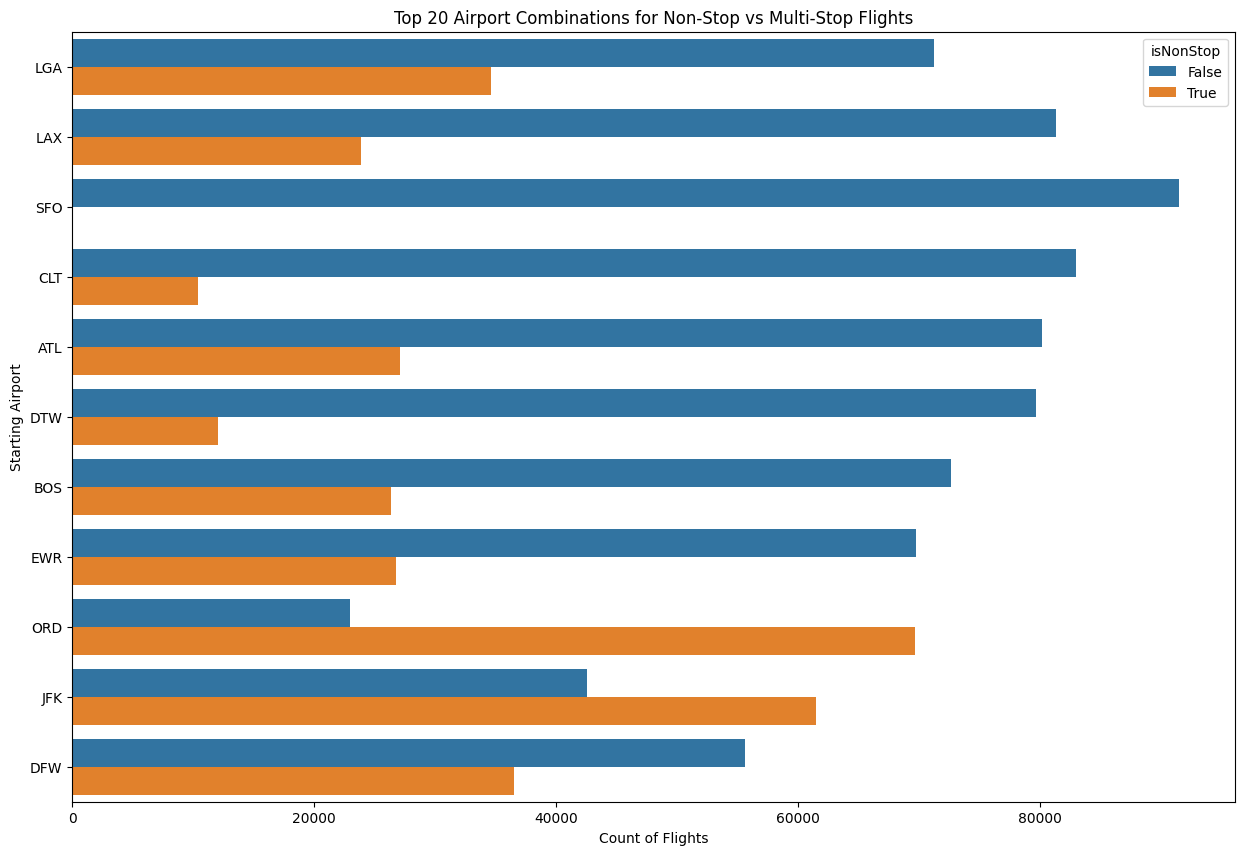

In [19]:
# Now, filter the original airport_combinations to only include these top 20 combinations
top_20_combinations = airport_combinations[airport_combinations.set_index(['startingAirport', 'destinationAirport']).index.isin(top_20_combinations.set_index(['startingAirport', 'destinationAirport']).index)]

# Sort the results to have them ordered by the total count for easier comparison
top_20_combinations_sorted = top_20_combinations.sort_values(by='Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='startingAirport', hue='isNonStop', data=top_20_combinations_sorted, ci=None, dodge=True)

# Set the title and labels
plt.title('Top 20 Airport Combinations for Non-Stop vs Multi-Stop Flights')
plt.xlabel('Count of Flights')
plt.ylabel('Starting Airport')

# Show the plot
plt.show()

# Feature Engineering

In [28]:
df_copy = data.copy()

In [7]:
!pip install isodate

  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)


In [29]:
from isodate import parse_duration
df_copy['travelDuration'] = df_copy['travelDuration'].apply(lambda x: parse_duration(x).total_seconds() / 3600)

In [30]:
df_copy['travelDuration']

0            2.033333
1            2.050000
2            2.000000
3            1.933333
4            1.933333
              ...    
13519994     8.066667
13519995     8.466667
13519996     8.666667
13519997    10.233333
13519998     8.683333
Name: travelDuration, Length: 13519999, dtype: float64

In [31]:
df_copy['totalTravelDistance'].isnull().sum()

959619

In [32]:
import re

def preprocess_segments_distance(distance):
    # Split the distance string by '||', replace 'None' with '0', strip whitespace, and sum the distances
    distances = distance.split('||')
    total_distance = sum(float(dist.strip() if dist.strip() not in ['None', ''] else '0') for dist in distances)
    return total_distance

# Apply the preprocessing function to the segmentsDistance column
df_copy['totalDistance'] = df_copy['segmentsDistance'].astype(str).apply(preprocess_segments_distance)

In [33]:
df_copy['totalDistance'].isnull().sum()

126985

In [34]:
df_copy['totalDistance'].sample(500)

5784083     1153.0
2113849      541.0
7451393     3353.0
8350627     2458.0
12718035    2897.0
             ...  
7617804     2469.0
3566996     2944.0
12373096    1380.0
12345561       0.0
2318089        0.0
Name: totalDistance, Length: 500, dtype: float64

In [35]:
df_copy.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalDistance
0,1a51d72836abfb4222f66fca6f4a49d2,2022-05-08,2022-06-17,DTW,ATL,2.033333,False,False,True,85.59,...,2022-06-17T20:01:00.000-04:00,ATL,DTW,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7320,NaN,coach,NaN
1,4e47e915423eb0dae0f016aae59b9f1a,2022-05-08,2022-06-17,DTW,ATL,2.050000,False,False,True,85.59,...,2022-06-17T23:28:00.000-04:00,ATL,DTW,Spirit Airlines,NK,NaN,7380,NaN,coach,NaN
2,4dff7978ba7a51f23c428ccd9fa2e306,2022-05-08,2022-06-17,DTW,ATL,2.000000,False,False,True,135.59,...,2022-06-17T14:09:00.000-04:00,ATL,DTW,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7200,NaN,coach,NaN
3,d7ce76b3688270c58e6699d320a49395,2022-05-08,2022-06-17,DTW,ATL,1.933333,True,False,True,148.60,...,2022-06-17T20:49:00.000-04:00,ATL,DTW,Delta,DL,Airbus A321,6960,604,coach,604.0
4,e93fb65eb0a493f7222694293fb5d53b,2022-05-08,2022-06-17,DTW,ATL,1.933333,True,False,True,148.60,...,2022-06-17T23:00:00.000-04:00,ATL,DTW,Delta,DL,Boeing 757-300,6960,604,coach,604.0


In [36]:
def get_date_features(flight_data):
    df = flight_data.copy()
    df['flightDate'] = pd.to_datetime(df['flightDate'])
    df['month'] = df['flightDate'].dt.month
    df['day'] = df['flightDate'].dt.day
    df['weekday'] = df['flightDate'].dt.dayofweek
    
    return df.drop(["flightDate"], axis=1)

df_copy = get_date_features(df_copy)

In [37]:
df_copy.head()

,legId,searchDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,...,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalDistance,month,day,weekday
0,1a51d72836abfb4222f66fca6f4a49d2,2022-05-08,DTW,ATL,2.033333,False,False,True,85.59,NaN,...,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7320,NaN,coach,NaN,6,17,4
1,4e47e915423eb0dae0f016aae59b9f1a,2022-05-08,DTW,ATL,2.050000,False,False,True,85.59,NaN,...,Spirit Airlines,NK,NaN,7380,NaN,coach,NaN,6,17,4
2,4dff7978ba7a51f23c428ccd9fa2e306,2022-05-08,DTW,ATL,2.000000,False,False,True,135.59,NaN,...,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,7200,NaN,coach,NaN,6,17,4
3,d7ce76b3688270c58e6699d320a49395,2022-05-08,DTW,ATL,1.933333,True,False,True,148.60,604.0,...,Delta,DL,Airbus A321,6960,604,coach,604.0,6,17,4
4,e93fb65eb0a493f7222694293fb5d53b,2022-05-08,DTW,ATL,1.933333,True,False,True,148.60,604.0,...,Delta,DL,Boeing 757-300,6960,604,coach,604.0,6,17,4


In [38]:
df_copy['segmentsCabinCode'].sample(500)

8359496            coach
1617511            coach
5239153            coach
3307604     coach||coach
12843871           coach
                ...     
7214856            coach
2648544            coach
10653951           coach
863368      coach||coach
2634350     coach||coach
Name: segmentsCabinCode, Length: 500, dtype: object

In [39]:
# Function to parse and extract unique cabin codes
def get_unique_cabin_codes(series):
    # Split the strings by '||', flatten the list of lists, and remove duplicates
    unique_codes = set(code.strip() for codes in series for code in codes.split('||') if code.strip())
    return unique_codes

# Use the function on the 'segmentsCabinCode' column of your dataframe
unique_cabin_codes = get_unique_cabin_codes(df_copy['segmentsCabinCode'])

# The `unique_cabin_codes` variable will contain all unique cabin codes from the column.
print(unique_cabin_codes)

{'business', 'coach', 'premium coach', 'first'}


In [44]:
# Define the hierarchy for cabin classes
cabin_class_hierarchy = {'coach': 1, 'premium coach': 2, 'business': 3, 'first': 4}
    
# Function to determine the highest cabin class
def highest_cabin(cabin_codes):
    cabin_ranks = [cabin_class_hierarchy.get(cabin.strip(), 0) for cabin in cabin_codes.split('||')]
    highest_rank = max(cabin_ranks)
    # Reverse lookup in the hierarchy dictionary to get the cabin class name
    highest_cabin = [cabin for cabin, rank in cabin_class_hierarchy.items() if rank == highest_rank]
    return highest_cabin[0] if highest_cabin else 'unknown'

# Determine the highest cabin class
df_copy['CabinClass'] = df_copy['segmentsCabinCode'].apply(highest_cabin)

In [45]:
df_copy['CabinClass'].sample(500)

58385       coach
10976708    coach
7026924     coach
922281      coach
1348379     coach
            ...  
5207905     coach
3220495     coach
7781798     coach
11816649    coach
12454898    coach
Name: CabinClass, Length: 500, dtype: object

In [46]:
# Drop unnecessary columns
columns_to_drop = ['legId', 'searchDate', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 
                       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 
                       'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 
                       'segmentsEquipmentDescription', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'totalTravelDistance', 'segmentsDurationInSeconds','segmentsDistance', 'segmentsCabinCode']
train_df = df_copy.drop(columns=columns_to_drop)

In [52]:
train_df.head()

,startingAirport,destinationAirport,travelDuration,totalFare,totalDistance,month,day,weekday,CabinClass
0,DTW,ATL,2.033333,85.59,NaN,6,17,4,coach
1,DTW,ATL,2.050000,85.59,NaN,6,17,4,coach
2,DTW,ATL,2.000000,135.59,NaN,6,17,4,coach
3,DTW,ATL,1.933333,148.60,604.0,6,17,4,coach
4,DTW,ATL,1.933333,148.60,604.0,6,17,4,coach


In [53]:
train_df.isnull().sum()

startingAirport            0
destinationAirport         0
travelDuration             0
totalFare                  0
totalDistance         126985
month                      0
day                        0
weekday                    0
CabinClass                 0
dtype: int64

In [54]:
train_df_cleaned = train_df.dropna(subset=['totalDistance'])

In [55]:
train_df_cleaned.shape

(13393014, 9)

# Modeling 

In [57]:
# Separate the features and the target variable
X = train_df_cleaned.drop('totalFare', axis=1)
y = train_df_cleaned['totalFare']

## Baseline

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the mean of totalFare
mean_total_fare = y.mean()

# Create a list with the mean value to match the length of the test set
baseline_predictions = [mean_total_fare] * len(X)

# Calculate the Mean Absolute Error of the baseline model
rmse_baseline = np.sqrt(mean_squared_error(y, baseline_predictions))
print(f"Root Mean Squared Error of the baseline model: {rmse_baseline}")

Root Mean Squared Error of the baseline model: 207.33198832798914


# Catboost Model

In [62]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/09/cb/4e1e986adfe82000a3d4f2b3d4e03e7f028b6c486946f34d0ca5ea94dffd/catboost-1.2.2-cp39-cp39-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 15.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 67.2 MB/s eta 0:00:00:00:0100:01


In [68]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define your model. You can tune the parameters as needed.
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=10,
    loss_function='RMSE',
    verbose=True
)

# Define the numerical features that need scaling
numerical_features = ['travelDuration', 'totalDistance', 'day', 'month', 'weekday']

categorical_features = ['startingAirport', 'destinationAirport', 'CabinClass']

# Column Transformer with just the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # This will keep the categorical features untouched
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert the processed numerical features back to a DataFrame
# Ensure that the column names match the order and number of columns after transformation
transformed_columns = numerical_features + categorical_features
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_columns, index=X_test.index)

# Inform CatBoost which features are categorical
cat_features_indices = [X_train_transformed_df.columns.get_loc(col) for col in categorical_features]

# Fit the CatBoost model on the transformed training data
catboost_model.fit(X_train_transformed_df, y_train, cat_features=cat_features_indices)

0:	learn: 197.9301362	total: 4.36s	remaining: 1h 12m 33s
1:	learn: 189.8652204	total: 7.86s	remaining: 1h 5m 22s
2:	learn: 182.6512138	total: 11.3s	remaining: 1h 2m 39s
3:	learn: 176.4236215	total: 14.1s	remaining: 58m 34s
4:	learn: 171.0665343	total: 17.3s	remaining: 57m 21s
5:	learn: 166.5571233	total: 19.9s	remaining: 54m 57s
6:	learn: 162.5448982	total: 22.8s	remaining: 54m
7:	learn: 159.1510407	total: 25.4s	remaining: 52m 32s
8:	learn: 156.2241655	total: 28.5s	remaining: 52m 14s
9:	learn: 153.4434226	total: 31s	remaining: 51m 7s
10:	learn: 151.1092191	total: 33.1s	remaining: 49m 36s
11:	learn: 148.9834784	total: 35.5s	remaining: 48m 43s
12:	learn: 147.1595260	total: 37.6s	remaining: 47m 32s
13:	learn: 145.5958758	total: 40.7s	remaining: 47m 43s
14:	learn: 144.1781488	total: 44.1s	remaining: 48m 13s
15:	learn: 142.9169343	total: 46.7s	remaining: 47m 50s
16:	learn: 141.8650916	total: 49.5s	remaining: 47m 41s
17:	learn: 140.9052963	total: 52.9s	remaining: 48m 4s
18:	learn: 140.070618

In [69]:
catboost_model.predict(X_test_transformed_df)

array([472.5164662 , 331.4162066 , 292.3694502 , ..., 229.18726507,
       176.87159639, 307.98488946])

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib

# Assuming you have your predictions in a variable named `predictions`
predictions = catboost_model.predict(X_test_transformed_df)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2:.2f}')

Root Mean Squared Error (RMSE): 103.73
Mean Absolute Error (MAE): 69.80
R-squared (R2): 0.75


In [73]:
# Save the model
joblib.dump(catboost_model, '../models/Sahil/catboost_model.joblib')

# Save the preprocessor
joblib.dump(preprocessor, '../models/Sahil/preprocessor.joblib')

['../models/Sahil/preprocessor.joblib']

# Model Evaluation

In [74]:
feature_importances = catboost_model.get_feature_importance()
feature_names = X_train_transformed_df.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

totalDistance: 25.390850472055348
startingAirport: 18.134024119273565
destinationAirport: 17.152311544121225
CabinClass: 10.497646519653145
travelDuration: 10.026846926051814
weekday: 7.686552103221988
month: 5.6144058976665026
day: 5.497362417956204


In [76]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/c3/f4/40bb8bbe5784678de897d228c5db7b09bef736040282dba4d576251c611a/shap-0.43.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 12.2 MB/s eta 0:00:00 0:00:01


In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_train_transformed_df)

# Visualize the first prediction's explanation
shap.summary_plot(shap_values, X_train_transformed_df)